In [1]:
from PIL import Image, ImageFilter

In [2]:
import numpy as np
import pylab as plt
import torch
import torch.nn as nn
from torchvision import models

from captum.attr import IntegratedGradients, NeuronIntegratedGradients

In [3]:
im = np.array(Image.open('./OI000359.JPG').crop((552, 0, 4108, 3456)).rotate(180).resize((256,256), resample=0))/255
# im = np.array(Image.open('./0171.jpeg').resize((256,256), resample=0).rotate(90))/255
input = torch.from_numpy(im.transpose(2,1,0)).float().unsqueeze(0)

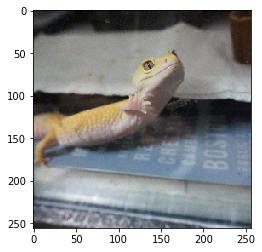

In [4]:
plt.imshow(input[0].transpose(0,1).transpose(1,2))
plt.show()

In [5]:
model = models.resnet50(pretrained=True)
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [6]:
baseline = torch.zeros(input.shape).to("cuda:0")

In [7]:
model = model.to("cuda:0")
input = input.to("cuda:0")
output = torch.argmax(model(input), dim=1)
print(output)
ig = IntegratedGradients(model.cpu())
attributions, delta = ig.attribute(input.cpu(), baseline.cpu(), target=output.cpu(), return_convergence_delta=True)

tensor([29], device='cuda:0')


In [8]:
att = torch.sum(torch.abs(attributions[0].transpose(1,0).transpose(1,2)), dim=2)
att = att.numpy()

inp = input.cpu()[0].transpose(0,1).transpose(1,2).numpy()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


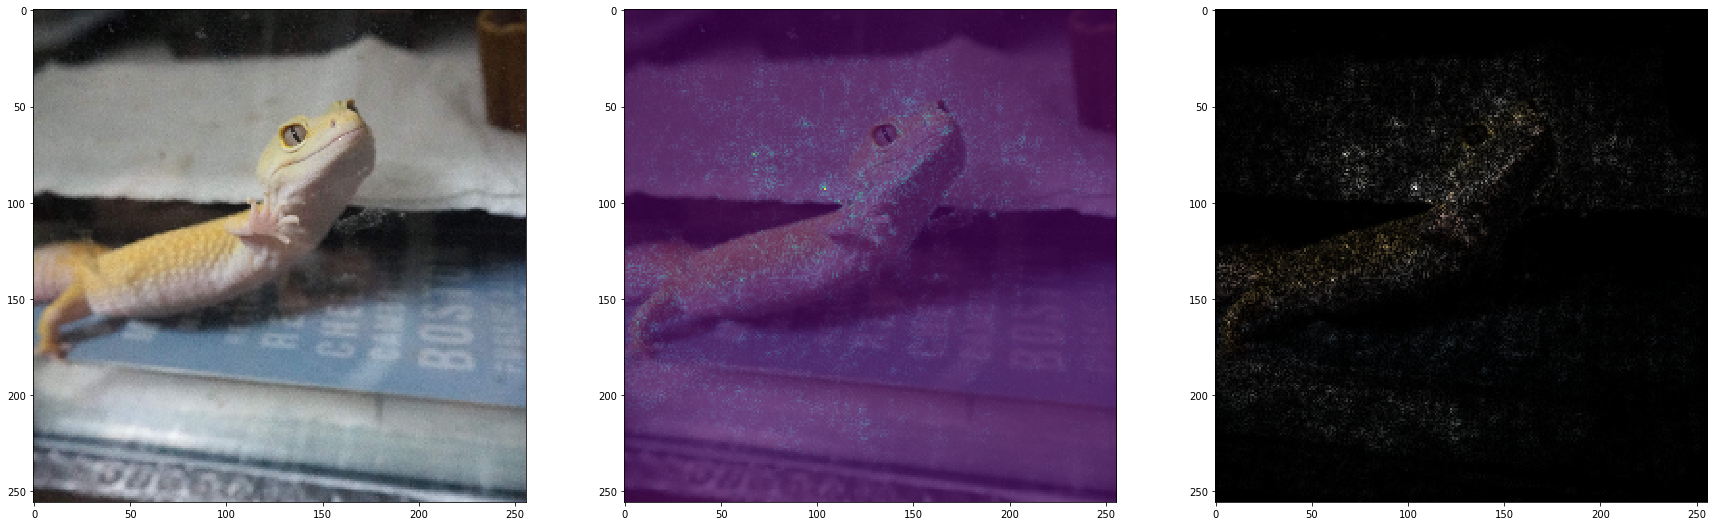

In [14]:
plt.figure(figsize=(30,10))

plt.subplot(131)
plt.imshow(inp)

plt.subplot(132)
plt.imshow(inp)
plt.imshow(att, cmap="viridis", alpha=0.7)

plt.subplot(133)
plt.imshow(inp * np.expand_dims(att, 2))

plt.show()

In [10]:
neuron_ig = NeuronIntegratedGradients(model.cpu(), model.fc)
attribution = neuron_ig.attribute(input.cpu(), (38))

In [11]:
att = torch.sum(torch.abs(attributions[0].transpose(1,0).transpose(1,2)), dim=2)
att = att.numpy()

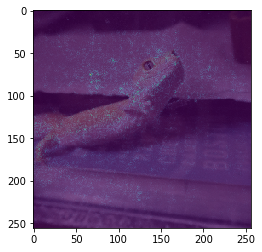

In [12]:
plt.imshow(input.cpu()[0].transpose(0,1).transpose(1,2))
plt.imshow(att, cmap="viridis", alpha=0.7)

plt.show()

In [15]:
neuron_ig = NeuronIntegratedGradients(model.cpu(), model.fc)
attribution = neuron_ig.attribute(input.cpu(), (29))